In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For creating plots
import statsmodels.api as sm  # For estimating statistical models
import io
from google.colab import files  # For file operations in Google Colab
from scipy.stats import ttest_ind
from scipy import stats
import statsmodels.stats.api as sms
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist

# Import Excel File

In [ ]:
uploaded = files.upload()
filename = list(uploaded.keys())[0]  # Gets the filename of the uploaded file

Without_TOT_D2 = pd.read_excel(io.BytesIO(uploaded[filename]))  # Reads the uploaded file into a DataFrame
Without_TOT_D2.to_csv('/content/data.csv', index=False)
print("Data saved as CSV file.")

Saving Without_TOT_D2.xlsx to Without_TOT_D2.xlsx
Data saved as CSV file.


# Normalization


In [ ]:
# 2010 - 2019 Dataframe
Altered_Data = Without_TOT_D2.drop(columns = ['Player', 'Position', 'Team', 'Season', 'GP'])

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(Altered_Data)

normalized_df = pd.DataFrame(normalized_data, columns=Altered_Data.columns)
normalized_df.head()

,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,...,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,Personal_Fouls,PTS
0,-1.230320,-1.256816,-0.385413,-1.062341,-1.144668,NaN,-0.944621,-0.901957,-0.924150,-1.295220,...,-0.767546,-1.379856,0.026066,-0.857804,-0.610914,-0.910107,-1.234829,-0.566007,-1.055604,-1.221604
1,0.474566,0.306025,0.682656,0.904343,0.663714,0.891925,0.156086,0.002708,0.834321,1.315860,...,0.186576,0.885301,-0.340238,-0.003659,-0.157572,0.177342,-0.507068,-0.113136,0.452505,0.554756
2,-0.743209,-0.820140,0.193124,-0.537892,-0.592107,0.210591,-0.614409,-0.675791,0.365396,0.119817,...,-0.886811,-0.078236,-0.584441,-0.573089,-0.610914,-0.964480,-0.992242,0.339735,0.904938,-0.817086
3,2.520429,2.236593,0.712325,-1.062341,-0.993970,-0.993098,3.293099,3.310389,0.233510,-0.031794,...,2.035187,0.411984,2.956498,1.306029,1.985504,0.014225,0.705867,1.698348,1.206560,2.172827
4,1.205231,1.018496,0.578816,1.691017,1.216276,1.050903,0.651404,0.568124,0.453319,1.248478,...,0.365474,1.172671,-0.462339,-0.117545,-0.239998,0.340459,0.705867,-0.566007,-0.150738,1.240677


# Dimension Reduction - Principal Component Analysis


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Find indices of NaN values
nan_indices = np.isnan(normalized_data).any(axis=1)

# Remove rows with NaN values
Altered_Data_Dropped = normalized_df[~nan_indices]
Altered_Data_Dropped = Altered_Data_Dropped.reset_index(drop = True)

# Apply PCA and reduce to 3 components
pca = PCA(n_components=3)
principal_components = pca.fit_transform(Altered_Data_Dropped)

# Extracting the PCA loadings
pca_loadings = pca.components_.T
pca_loadings_df = pd.DataFrame(pca_loadings, index=Altered_Data_Dropped.columns)
pca_loadings_df.columns = ['PC1', 'PC2', 'PC3']
pca_loadings_df

,PC1,PC2,PC3
FG,0.312831,-0.081844,-0.007502
FGA,0.297683,-0.158296,0.044353
FG%,0.121217,0.292796,-0.332847
3P,0.115134,-0.368626,-0.277198
3PA,0.116939,-0.374120,-0.227729
3P%,0.010157,-0.286125,-0.298973
2P,0.305176,0.061757,0.107995
2PA,0.300394,0.015737,0.182598
2P%,0.094600,0.237382,-0.450178
eFG%,0.092434,0.116760,-0.599360


In [ ]:
# Creating PCA Variance Table
Percentage_of_Variance_Explained = pca.explained_variance_ratio_
Variance_Explained = pca.explained_variance_
PCA_Table = pd.DataFrame(Variance_Explained.round(2))
PCA_Table['Percentage of Variance Explained'] = Percentage_of_Variance_Explained.round(4)*100
PCA_Table['Cumulative Percentage of Variance Explained'] = PCA_Table['Percentage of Variance Explained'].cumsum()
PCA_Table = PCA_Table.rename(columns = {0: 'Variance Explained'})
PCA_Table = PCA_Table.set_index(pd.Index(['PC1', 'PC2', 'PC3']))
PCA_Table

,Variance Explained,Percentage of Variance Explained,Cumulative Percentage of Variance Explained
PC1,9.50,46.45,46.45
PC2,4.10,20.05,66.50
PC3,1.92,9.41,75.91


In [ ]:
# Subsetting PCAs
PC1 = pd.DataFrame(pca_loadings_df['PC1'])
PC2 = pd.DataFrame(pca_loadings_df['PC2'])
PC3 = pd.DataFrame(pca_loadings_df['PC3'])

In [ ]:
# PC Analysis
Sorted_PC1 = PC1.sort_values(by = 'PC1', key = abs, ascending = False)
Sorted_PC2 = PC2.sort_values(by = 'PC2', key = abs, ascending = False)
Sorted_PC3 = PC3.sort_values(by = 'PC3', key = abs, ascending = False)

In [ ]:
Sorted_PC1

,PC1
FG,0.312831
PTS,0.310212
2P,0.305176
2PA,0.300394
FGA,0.297683
FTA,0.294394
FT,0.289213
DRB,0.256008
TRB,0.241318
Personal_Fouls,0.215415


In [ ]:
Sorted_PC2

,PC2
3PA,-0.374120
3P,-0.368626
ORB,0.342985
FG%,0.292796
3P%,-0.286125
BLK,0.278875
TRB,0.245990
FT%,-0.241773
2P%,0.237382
AST,-0.219108


In [ ]:
Sorted_PC3

,PC3
eFG%,-0.599360
2P%,-0.450178
FG%,-0.332847
3P%,-0.298973
3P,-0.277198
3PA,-0.227729
2PA,0.182598
FTA,0.124673
AST,0.114691
FT%,-0.112625


# Elbow Plot & Silhouette Plot

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

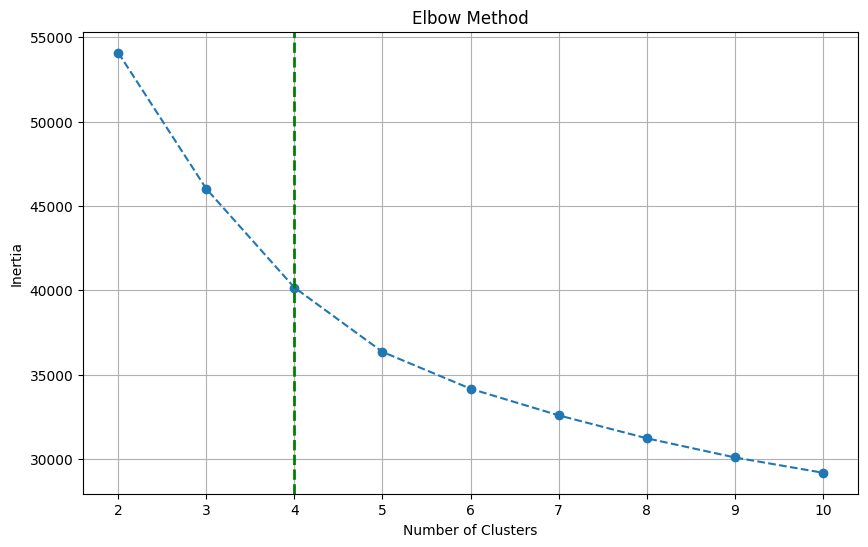

In [ ]:
from sklearn.cluster import KMeans

# Define a range of clusters
cluster_range = range(2, 11)

# Compute KMeans for each number of clusters
inertias = []
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(Altered_Data_Dropped)
    inertias.append(kmeans.inertia_)

# Plot the Elbow method
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertias, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.axvline(x=4, color = 'green', linestyle = '--', linewidth = 2)
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

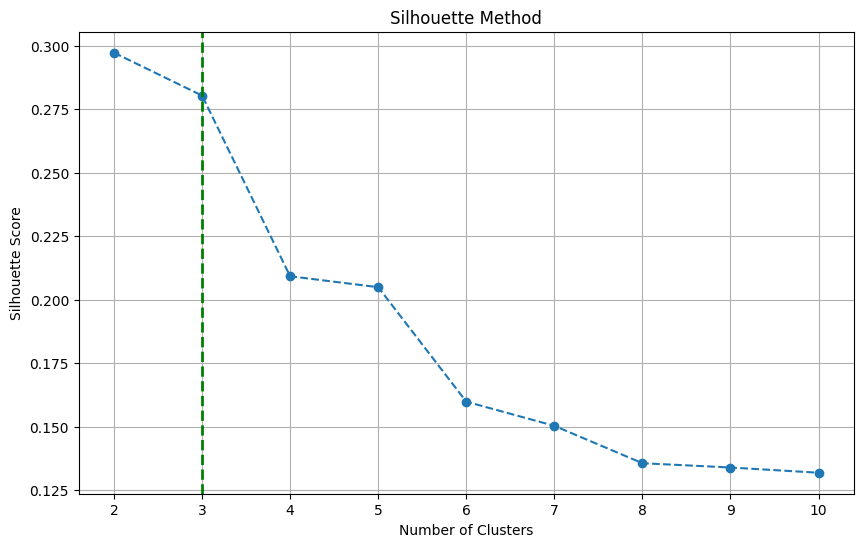

In [ ]:
# Create Silhouette scores
silhouette_scores = [silhouette_score(Altered_Data_Dropped, KMeans(n_clusters=k, random_state=42).fit_predict(Altered_Data_Dropped)) for k in cluster_range]

# Plot the Silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.axvline(x=3, color='green', linestyle='--', linewidth=2)
plt.show()

# KMeans Clustering

In [ ]:
from sklearn.cluster import KMeans

# Initialize KMeans with 4 clusters
kmeans_4 = KMeans(n_clusters=4, random_state=42)

# Fit the model to the normalized data
kmeans_4.fit(Altered_Data_Dropped)

# Obtain cluster labels
labels = kmeans_4.labels_
cluster_labels = pd.DataFrame(labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Steps for creating new dataframe with Cluster assignments, positions of players, and all player statistics

# 1) Append clusters to Altered_Data_Dropped
Altered_Data_Dropped['Cluster'] = cluster_labels

# We want to add a position column to the Altered_Data_Dropped dataframe

# 2) Create new dataframe with Position column
df_including_positions = Without_TOT_D2

# 3) Find indices of NaN values
nan_indices = np.isnan(normalized_data).any(axis=1)

# 4) Remove rows with NaN values
df_including_positions = df_including_positions[~nan_indices]
df_including_positions_Dropped = df_including_positions.reset_index(drop = True)

# 5) Append Cluster column to df_including_positions_Dropped df
df_including_positions_Dropped['Cluster'] = Altered_Data_Dropped['Cluster']

# 6) Create Decade1_Cluster_Data
Decade2_Cluster_Data = df_including_positions_Dropped

# Principal Compononent Scatter Plot


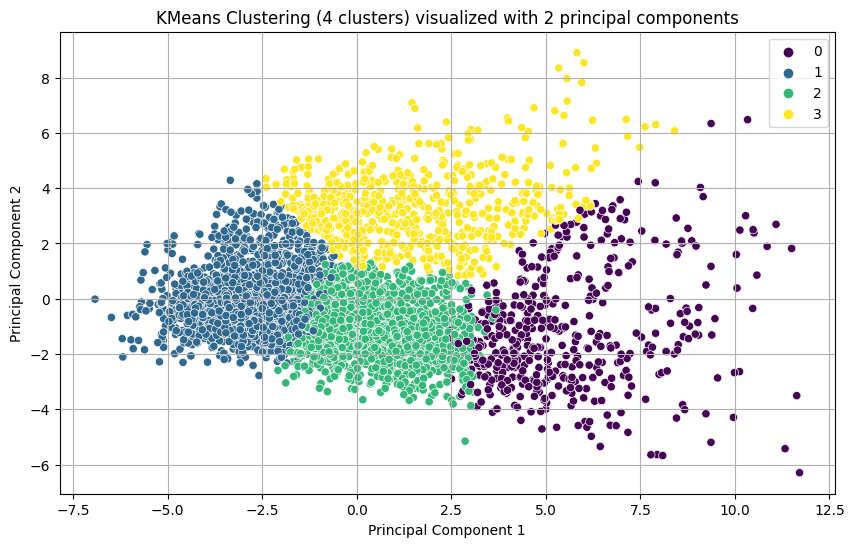

In [ ]:
# PC Scatter Plot
plt.figure(figsize=(10,6))
scatter = sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=labels, palette='viridis', legend='full')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering (4 clusters) visualized with 2 principal components')
plt.legend()
plt.grid(True)
plt.show()

# Cluster Averages

In [ ]:
Cluster_1 = Decade2_Cluster_Data[Decade2_Cluster_Data['Cluster'] == 0]
Cluster_2 = Decade2_Cluster_Data[Decade2_Cluster_Data['Cluster'] == 1]
Cluster_3 = Decade2_Cluster_Data[Decade2_Cluster_Data['Cluster'] == 2]
Cluster_4 = Decade2_Cluster_Data[Decade2_Cluster_Data['Cluster'] == 3]

cluster_1_stats = Cluster_1.describe()
cluster_2_stats = Cluster_2.describe()
cluster_3_stats = Cluster_3.describe()
cluster_4_stats = Cluster_4.describe()

Decade2_Cluster_Averages = pd.concat([cluster_1_stats.loc[['mean']], cluster_2_stats.loc[['mean']], cluster_3_stats.loc[['mean']], cluster_4_stats.loc[['mean']]])
Decade2_Cluster_Averages['Cluster'] = [0, 1, 2, 3]
Decade2_Cluster_Averages = pd.DataFrame(Decade2_Cluster_Averages)
Decade2_Cluster_Averages = Decade2_Cluster_Averages.drop(columns = 'GP')

In [ ]:
# Subsetting Cluster Average Columns
pts_column = Decade2_Cluster_Averages['PTS']
ast_column = Decade2_Cluster_Averages['AST']
trb_column = Decade2_Cluster_Averages['TRB']
blk_column = Decade2_Cluster_Averages['BLK']
stl_column = Decade2_Cluster_Averages['STL']
three_column = Decade2_Cluster_Averages['3PA']
two_column = Decade2_Cluster_Averages['2PA']
fta_column = Decade2_Cluster_Averages['FTA']

# Drop columns from the DataFrame
Decade2_Cluster_Averages = Decade2_Cluster_Averages.drop(columns=['PTS'])
Decade2_Cluster_Averages = Decade2_Cluster_Averages.drop(columns=['AST'])
Decade2_Cluster_Averages = Decade2_Cluster_Averages.drop(columns=['TRB'])
Decade2_Cluster_Averages = Decade2_Cluster_Averages.drop(columns=['BLK'])
Decade2_Cluster_Averages = Decade2_Cluster_Averages.drop(columns=['STL'])
Decade2_Cluster_Averages = Decade2_Cluster_Averages.drop(columns=['3PA'])
Decade2_Cluster_Averages = Decade2_Cluster_Averages.drop(columns=['2PA'])
Decade2_Cluster_Averages = Decade2_Cluster_Averages.drop(columns=['FTA'])

# Insert columns to new positions
Decade2_Cluster_Averages.insert(0, 'PTS', pts_column)
Decade2_Cluster_Averages.insert(1, 'AST', ast_column)
Decade2_Cluster_Averages.insert(2, 'TRB', trb_column)
Decade2_Cluster_Averages.insert(3, 'BLK', blk_column)
Decade2_Cluster_Averages.insert(4, 'STL', stl_column)
Decade2_Cluster_Averages.insert(5, '3PA', three_column)
Decade2_Cluster_Averages.insert(6, '2PA', two_column)
Decade2_Cluster_Averages.insert(7, 'FTA', fta_column)

# Set the index as Cluster
Decade2_Cluster_Averages = Decade2_Cluster_Averages.set_index('Cluster')

In [ ]:
# Subset to inferential columns
Decade2_Cluster_Averages[['PTS', 'AST', 'TRB', 'BLK', 'STL', '3PA', '3P%', '2PA', '2P%', 'FTA', 'FT%']]

,PTS,AST,TRB,BLK,STL,3PA,3P%,2PA,2P%,FTA,FT%
Cluster,,,,,,,,,,,
0,20.596281,4.684711,6.033678,0.610950,1.216529,4.163430,0.336620,11.865289,0.496961,5.336364,0.807824
1,4.843829,1.203936,2.263909,0.235957,0.465377,1.589993,0.303199,2.752702,0.465278,0.927885,0.725650
2,11.333842,2.791801,3.655225,0.325884,0.893730,3.848875,0.362581,5.686254,0.478747,2.110450,0.793117
3,10.026202,1.414262,6.785406,0.938143,0.687396,0.457711,0.166430,7.383914,0.541415,2.535158,0.687181


In [ ]:
# Check for cluster player examples by typing in random player names, for example, Ray Allen
Decade2_Cluster_Data[Decade2_Cluster_Data['Player'] == 'Ray Allen*']

,Player,Position,Team,GP,FG,FGA,FG%,3P,3PA,3P%,...,ORB,DRB,TRB,AST,STL,BLK,Personal_Fouls,PTS,Season,Cluster
3,Ray Allen*,SG,BOS,80,6.0,12.2,0.491,2.1,4.7,0.444,...,0.6,2.8,3.4,2.7,1.0,0.2,1.8,16.5,2010-11,2
361,Ray Allen*,SG,BOS,46,4.9,10.7,0.458,2.3,5.1,0.453,...,0.3,2.8,3.1,2.4,1.1,0.2,1.8,14.2,2011-12,2
703,Ray Allen*,SG,MIA,79,3.7,8.2,0.449,1.8,4.2,0.419,...,0.5,2.2,2.7,1.7,0.8,0.2,1.6,10.9,2012-13,2
1077,Ray Allen*,SG,MIA,73,3.3,7.4,0.442,1.6,4.2,0.375,...,0.3,2.5,2.8,2.0,0.7,0.1,1.6,9.6,2013-14,2
